In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("forestfires.csv")

# EDA

In [4]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [6]:
col=['month', 'day', 'size_category']
for i in col:
    print(df[i].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
small    378
large    139
Name: size_category, dtype: int64


# Visualization

In [7]:
# Dealing with categorical columns
df=pd.get_dummies(df,columns=['size_category'],drop_first=True)

In [8]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category_small'],
      dtype='object')

In [9]:
x=df.drop(columns=['month', 'day','size_category_small'])
y=df["size_category_small"]

In [10]:
x.shape

(517, 28)

In [14]:
y.value_counts()

1    378
0    139
Name: size_category_small, dtype: int64

<AxesSubplot:>

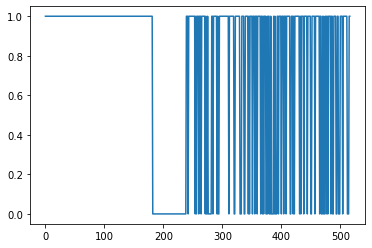

In [11]:
y.plot()

<AxesSubplot:ylabel='Frequency'>

<Figure size 720x720 with 0 Axes>

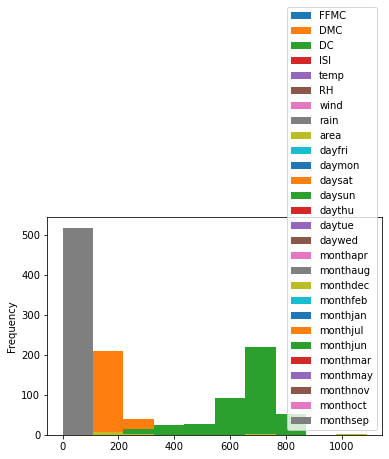

In [12]:
plt.figure(figsize=(10,10))
x.plot(kind="hist")

# Model Building

In [16]:
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from keras.optimizers import adam_v2
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [17]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam = adam_v2.Adam(lr=0.01)
    
    model.compile(loss = 'binary_crossentropy',
                  optimizer = adam,
                  metrics = ['accuracy'])
    
    return model

In [18]:
# Create the model
model = KerasClassifier(build_fn = create_model, verbose = 0)

# Define the grid search parameters
batch_size = [10, 20, 40]
epochs = [10, 50, 100, 150]

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,
                  epochs = epochs)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,
                    param_grid = param_grid,
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(x, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=10, epochs=10...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 1/12] END ....batch_size=10, epochs=10;, score=1.000 total time=   5.4s
[CV 2/5; 1/12] START batch_size=10, epochs=10...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 1/12] END ....batch_size=10, epochs=10;, score=0.981 total time=   1.1s
[CV 3/5; 1/12] START batch_size=10, epochs=10...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 1/12] END ....batch_size=10, epochs=10;, score=0.981 total time=   1.1s
[CV 4/5; 1/12] START batch_size=10, epochs=10...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 1/12] END ....batch_size=10, epochs=10;, score=0.932 total time=   1.1s
[CV 5/5; 1/12] START batch_size=10, epochs=10...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 1/12] END ....batch_size=10, epochs=10;, score=0.942 total time=   1.3s
[CV 1/5; 2/12] START batch_size=10, epochs=50...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 2/12] END ....batch_size=10, epochs=50;, score=1.000 total time=   3.0s
[CV 2/5; 2/12] START batch_size=10, epochs=50...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 2/12] END ....batch_size=10, epochs=50;, score=0.990 total time=   3.1s
[CV 3/5; 2/12] START batch_size=10, epochs=50...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 2/12] END ....batch_size=10, epochs=50;, score=0.961 total time=   3.0s
[CV 4/5; 2/12] START batch_size=10, epochs=50...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 2/12] END ....batch_size=10, epochs=50;, score=0.922 total time=   3.6s
[CV 5/5; 2/12] START batch_size=10, epochs=50...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 2/12] END ....batch_size=10, epochs=50;, score=0.951 total time=   3.2s
[CV 1/5; 3/12] START batch_size=10, epochs=100..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 3/12] END ...batch_size=10, epochs=100;, score=1.000 total time=   5.6s
[CV 2/5; 3/12] START batch_size=10, epochs=100..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 3/12] END ...batch_size=10, epochs=100;, score=0.952 total time=   6.1s
[CV 3/5; 3/12] START batch_size=10, epochs=100..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 3/12] END ...batch_size=10, epochs=100;, score=0.990 total time=   5.7s
[CV 4/5; 3/12] START batch_size=10, epochs=100..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 3/12] END ...batch_size=10, epochs=100;, score=0.951 total time=   5.5s
[CV 5/5; 3/12] START batch_size=10, epochs=100..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 3/12] END ...batch_size=10, epochs=100;, score=0.981 total time=   6.8s
[CV 1/5; 4/12] START batch_size=10, epochs=150..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 4/12] END ...batch_size=10, epochs=150;, score=1.000 total time=   8.2s
[CV 2/5; 4/12] START batch_size=10, epochs=150..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 4/12] END ...batch_size=10, epochs=150;, score=0.981 total time=   7.7s
[CV 3/5; 4/12] START batch_size=10, epochs=150..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 4/12] END ...batch_size=10, epochs=150;, score=0.990 total time=   7.7s
[CV 4/5; 4/12] START batch_size=10, epochs=150..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 4/12] END ...batch_size=10, epochs=150;, score=0.961 total time=  10.2s
[CV 5/5; 4/12] START batch_size=10, epochs=150..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 4/12] END ...batch_size=10, epochs=150;, score=0.932 total time=   9.9s
[CV 1/5; 5/12] START batch_size=20, epochs=10...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 5/12] END ....batch_size=20, epochs=10;, score=1.000 total time=   1.0s
[CV 2/5; 5/12] START batch_size=20, epochs=10...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 5/12] END ....batch_size=20, epochs=10;, score=0.952 total time=   0.9s
[CV 3/5; 5/12] START batch_size=20, epochs=10...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 5/12] END ....batch_size=20, epochs=10;, score=0.990 total time=   1.1s
[CV 4/5; 5/12] START batch_size=20, epochs=10...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 5/12] END ....batch_size=20, epochs=10;, score=0.932 total time=   1.3s
[CV 5/5; 5/12] START batch_size=20, epochs=10...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 5/12] END ....batch_size=20, epochs=10;, score=0.883 total time=   1.1s
[CV 1/5; 6/12] START batch_size=20, epochs=50...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 6/12] END ....batch_size=20, epochs=50;, score=1.000 total time=   2.3s
[CV 2/5; 6/12] START batch_size=20, epochs=50...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 6/12] END ....batch_size=20, epochs=50;, score=0.990 total time=   2.7s
[CV 3/5; 6/12] START batch_size=20, epochs=50...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 6/12] END ....batch_size=20, epochs=50;, score=0.990 total time=   2.4s
[CV 4/5; 6/12] START batch_size=20, epochs=50...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 6/12] END ....batch_size=20, epochs=50;, score=0.942 total time=   2.3s
[CV 5/5; 6/12] START batch_size=20, epochs=50...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 6/12] END ....batch_size=20, epochs=50;, score=0.961 total time=   2.6s
[CV 1/5; 7/12] START batch_size=20, epochs=100..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 7/12] END ...batch_size=20, epochs=100;, score=1.000 total time=   4.1s
[CV 2/5; 7/12] START batch_size=20, epochs=100..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 7/12] END ...batch_size=20, epochs=100;, score=0.981 total time=   4.7s
[CV 3/5; 7/12] START batch_size=20, epochs=100..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 7/12] END ...batch_size=20, epochs=100;, score=0.990 total time=   3.6s
[CV 4/5; 7/12] START batch_size=20, epochs=100..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 7/12] END ...batch_size=20, epochs=100;, score=0.942 total time=   3.5s
[CV 5/5; 7/12] START batch_size=20, epochs=100..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 7/12] END ...batch_size=20, epochs=100;, score=0.981 total time=   4.2s
[CV 1/5; 8/12] START batch_size=20, epochs=150..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 8/12] END ...batch_size=20, epochs=150;, score=1.000 total time=   5.7s
[CV 2/5; 8/12] START batch_size=20, epochs=150..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 8/12] END ...batch_size=20, epochs=150;, score=0.933 total time=   5.8s
[CV 3/5; 8/12] START batch_size=20, epochs=150..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 8/12] END ...batch_size=20, epochs=150;, score=0.971 total time=   5.6s
[CV 4/5; 8/12] START batch_size=20, epochs=150..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 8/12] END ...batch_size=20, epochs=150;, score=0.951 total time=   5.0s
[CV 5/5; 8/12] START batch_size=20, epochs=150..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 8/12] END ...batch_size=20, epochs=150;, score=0.971 total time=   4.6s
[CV 1/5; 9/12] START batch_size=40, epochs=10...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 9/12] END ....batch_size=40, epochs=10;, score=1.000 total time=   0.8s
[CV 2/5; 9/12] START batch_size=40, epochs=10...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 9/12] END ....batch_size=40, epochs=10;, score=0.942 total time=   0.8s
[CV 3/5; 9/12] START batch_size=40, epochs=10...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 9/12] END ....batch_size=40, epochs=10;, score=0.874 total time=   1.1s
[CV 4/5; 9/12] START batch_size=40, epochs=10...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 9/12] END ....batch_size=40, epochs=10;, score=0.981 total time=   0.8s
[CV 5/5; 9/12] START batch_size=40, epochs=10...................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 9/12] END ....batch_size=40, epochs=10;, score=0.903 total time=   0.8s
[CV 1/5; 10/12] START batch_size=40, epochs=50..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 10/12] END ...batch_size=40, epochs=50;, score=1.000 total time=   1.4s
[CV 2/5; 10/12] START batch_size=40, epochs=50..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 10/12] END ...batch_size=40, epochs=50;, score=1.000 total time=   1.4s
[CV 3/5; 10/12] START batch_size=40, epochs=50..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 10/12] END ...batch_size=40, epochs=50;, score=0.990 total time=   1.4s
[CV 4/5; 10/12] START batch_size=40, epochs=50..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 10/12] END ...batch_size=40, epochs=50;, score=0.942 total time=   1.6s
[CV 5/5; 10/12] START batch_size=40, epochs=50..................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 10/12] END ...batch_size=40, epochs=50;, score=0.990 total time=   1.4s
[CV 1/5; 11/12] START batch_size=40, epochs=100.................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 11/12] END ..batch_size=40, epochs=100;, score=1.000 total time=   2.1s
[CV 2/5; 11/12] START batch_size=40, epochs=100.................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 11/12] END ..batch_size=40, epochs=100;, score=0.981 total time=   2.4s
[CV 3/5; 11/12] START batch_size=40, epochs=100.................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 11/12] END ..batch_size=40, epochs=100;, score=1.000 total time=   2.8s
[CV 4/5; 11/12] START batch_size=40, epochs=100.................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 11/12] END ..batch_size=40, epochs=100;, score=0.942 total time=   2.6s
[CV 5/5; 11/12] START batch_size=40, epochs=100.................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 11/12] END ..batch_size=40, epochs=100;, score=0.961 total time=   3.0s
[CV 1/5; 12/12] START batch_size=40, epochs=150.................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 1/5; 12/12] END ..batch_size=40, epochs=150;, score=1.000 total time=   3.7s
[CV 2/5; 12/12] START batch_size=40, epochs=150.................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 2/5; 12/12] END ..batch_size=40, epochs=150;, score=0.942 total time=   3.2s
[CV 3/5; 12/12] START batch_size=40, epochs=150.................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 3/5; 12/12] END ..batch_size=40, epochs=150;, score=0.990 total time=   3.7s
[CV 4/5; 12/12] START batch_size=40, epochs=150.................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 4/5; 12/12] END ..batch_size=40, epochs=150;, score=0.951 total time=   3.9s
[CV 5/5; 12/12] START batch_size=40, epochs=150.................................


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[CV 5/5; 12/12] END ..batch_size=40, epochs=150;, score=0.951 total time=   3.7s


E:\Anaconda\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
E:\Anaconda\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [19]:
print('Best : {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9844660194174757, using {'batch_size': 40, 'epochs': 50}
0.9670276325616133,0.025779996136685284 with: {'batch_size': 10, 'epochs': 10}
0.9650672143390591,0.02788625144059333 with: {'batch_size': 10, 'epochs': 50}
0.9748506348020911,0.019883286502269636 with: {'batch_size': 10, 'epochs': 100}
0.9728528752800598,0.02410860254220439 with: {'batch_size': 10, 'epochs': 150}
0.9515496639283046,0.04209649829246636 with: {'batch_size': 20, 'epochs': 10}
0.9767176997759522,0.021807734504515553 with: {'batch_size': 20, 'epochs': 50}
0.9786781179985062,0.01980581961054577 with: {'batch_size': 20, 'epochs': 100}
0.9651792382374907,0.022454668131392918 with: {'batch_size': 20, 'epochs': 150}
0.9399178491411501,0.04692962055479977 with: {'batch_size': 40, 'epochs': 10}
0.9844660194174757,0.021796062447226833 with: {'batch_size': 40, 'epochs': 50}
0.9767363704256908,0.02265099957109732 with: {'batch_size': 40, 'epochs': 100}
0.9671023151605675,0.023342464156437922 with: {'batch_size': 40, '